In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

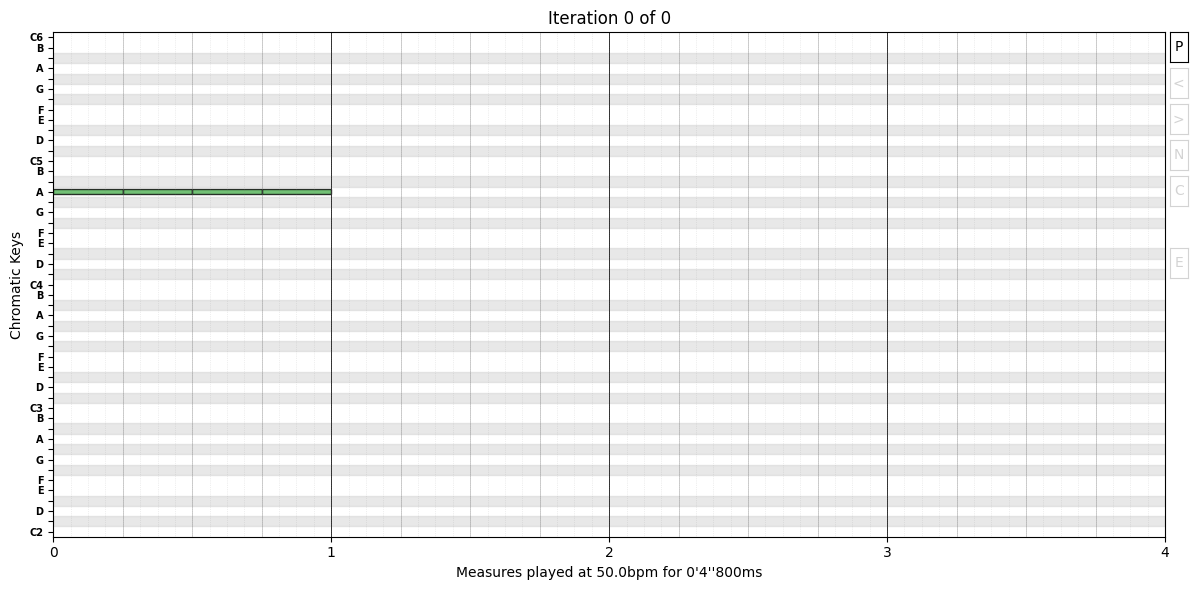

In [2]:
settings << Tempo(50) << Minor()   # Minor will mean the A as the default Tonic Key !
treble_melody = Note() / 4
treble_melody >> Plot()

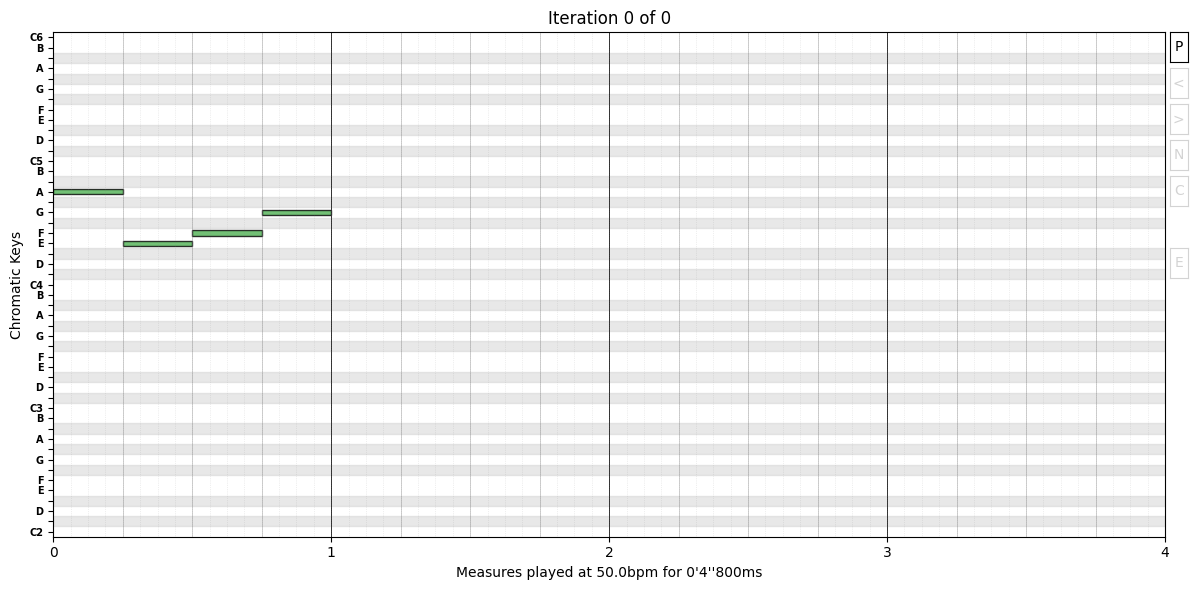

In [3]:
# Sets the Root Note for each Beat
treble_melody << Foreach("A", "E", "F", "G")**RootKey()
treble_melody >> Plot()

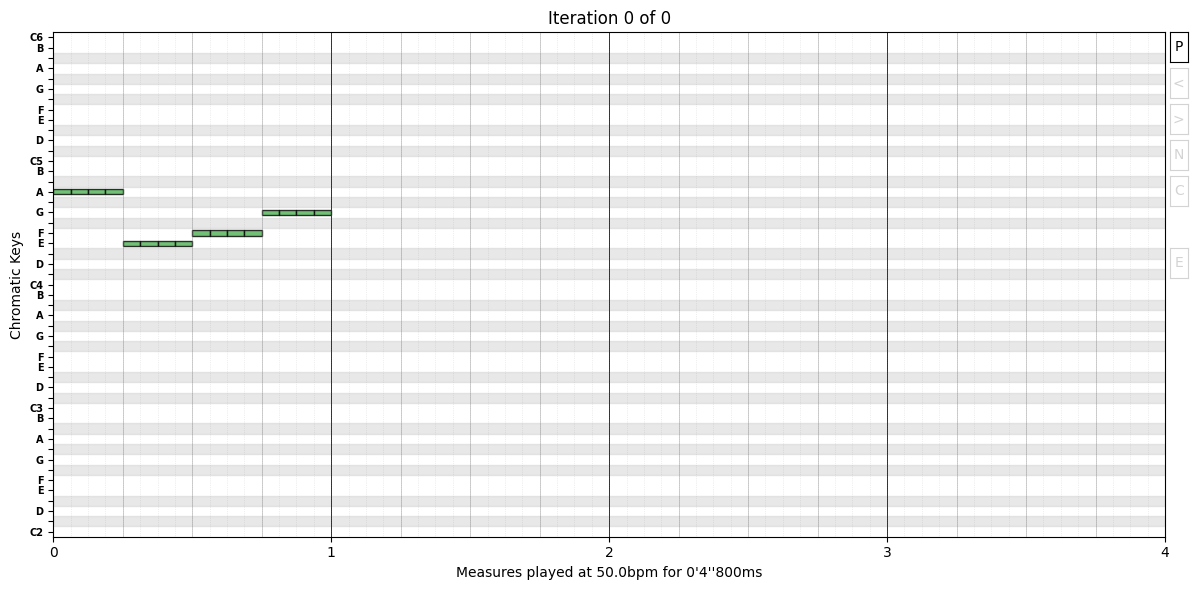

In [4]:
# Splits all notes by a duration of a single Step, equal to 1/4 of a Beat by default
treble_melody //= Steps(1)
treble_melody >> Plot()

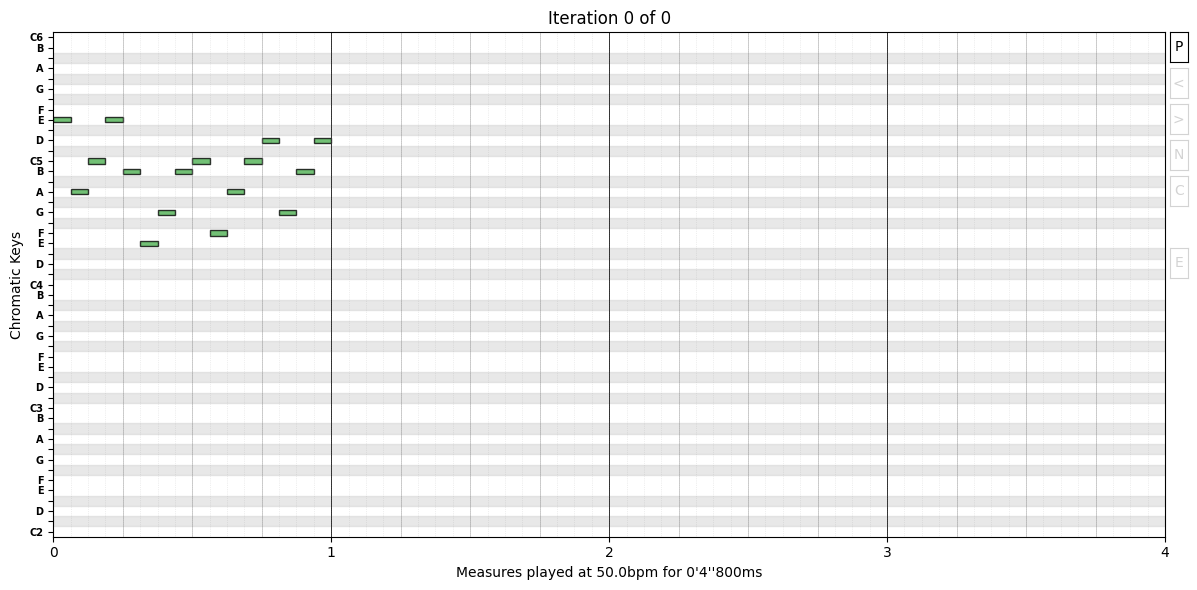

In [5]:
# Offsets the notes up the respective Degrees by multiples of 2
treble_melody += Foreach(2, 0, 1, 2)**Multiply(2)**Degree()
treble_melody >> Plot()

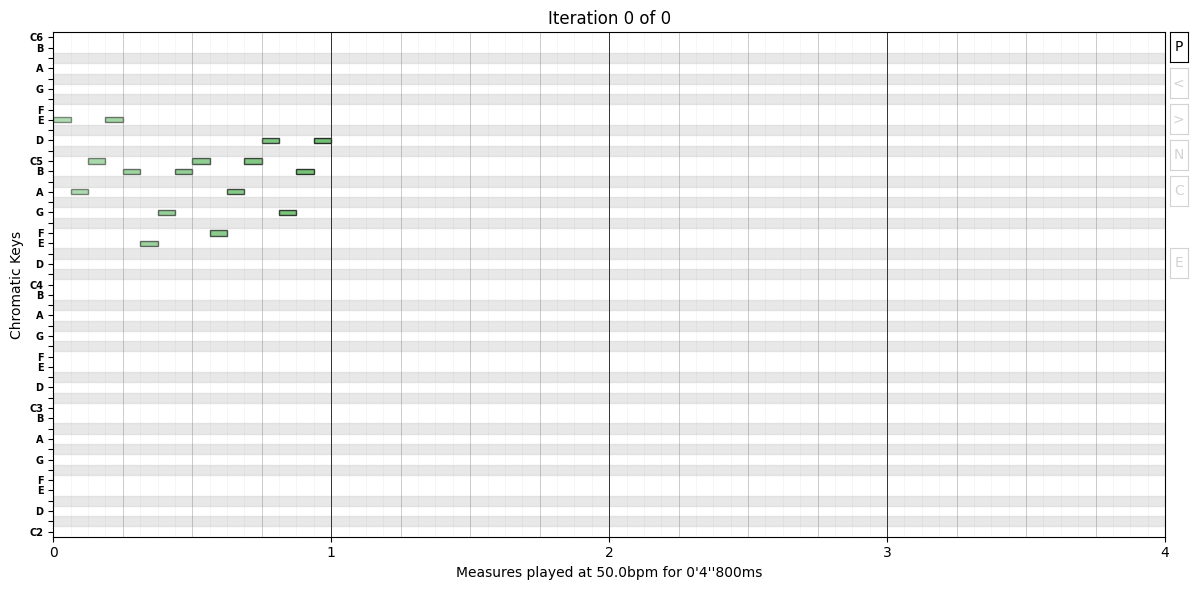

In [6]:
# Setting a Crescendo based on Step Position
treble_melody << Get(Step())**Multiply(3)**Add(55)**Velocity()
treble_melody >> Plot()

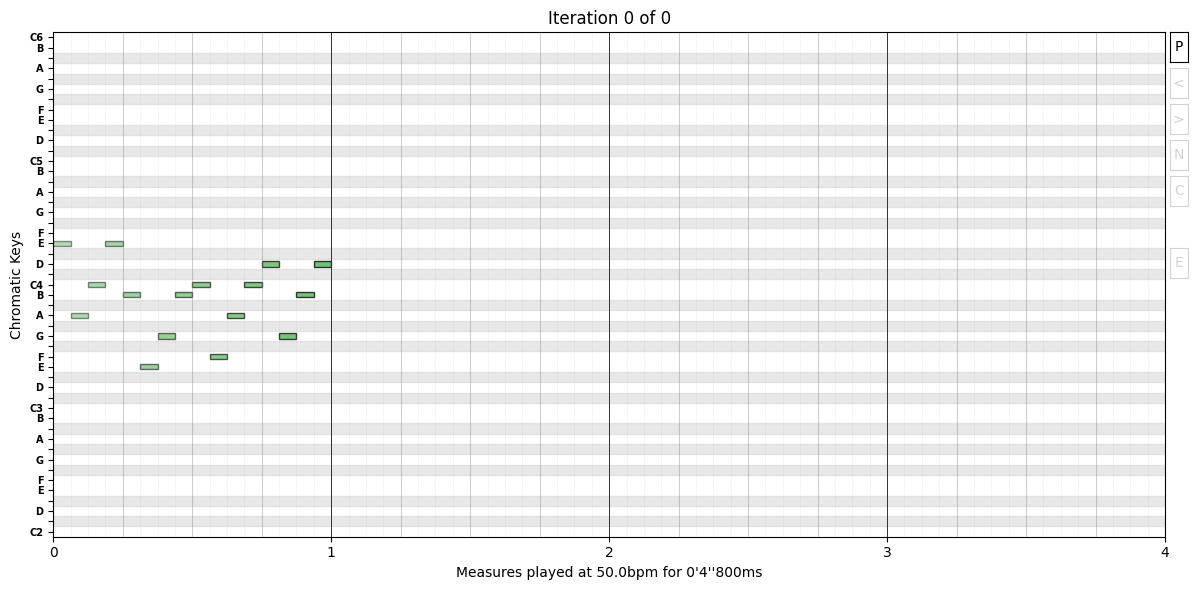

In [7]:
# Basic operations reult in implicit copies from left and right operands
bass_melody = treble_melody - Octave(1)
bass_melody >> Plot()

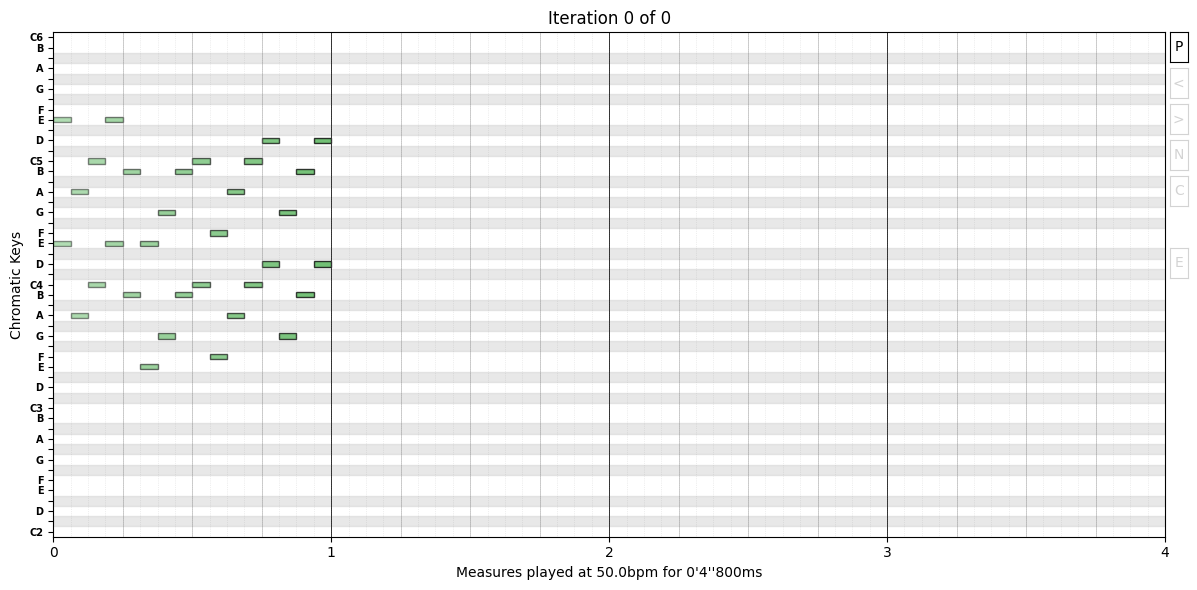

In [8]:
first_melody = treble_melody + bass_melody
first_melody >> Plot()

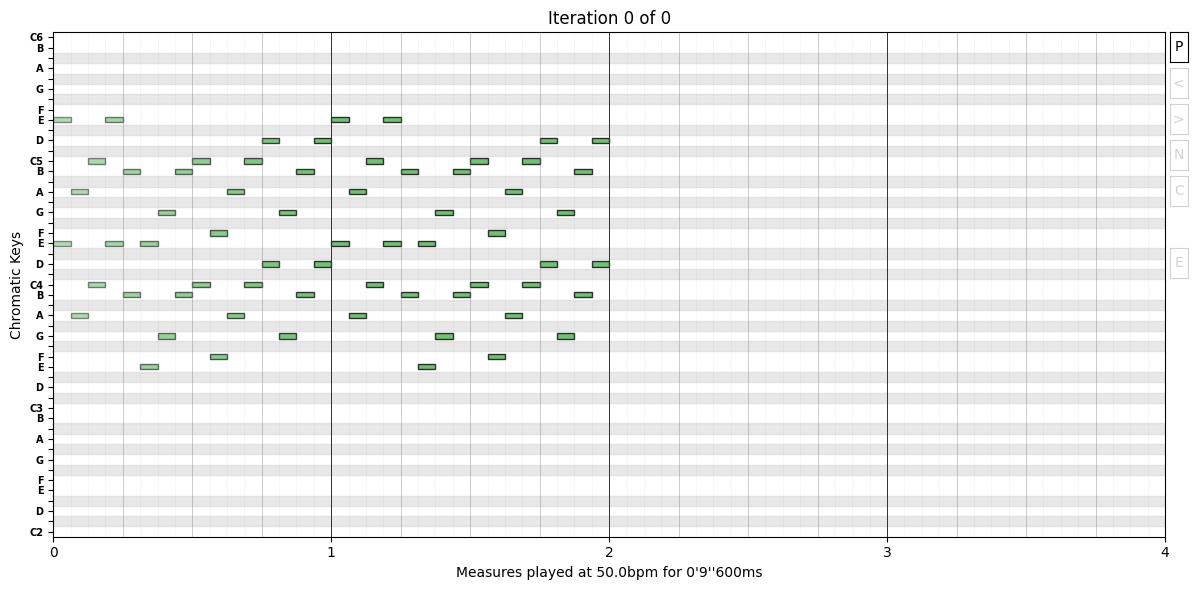

In [9]:
# Inline operations, like `=*`, preserve the left operand and do not result in any copy, except for the right operands
first_melody *= 2
first_melody << Equal(Measure(1))**Velocity( first_melody[Last()] )
first_melody >> Plot()

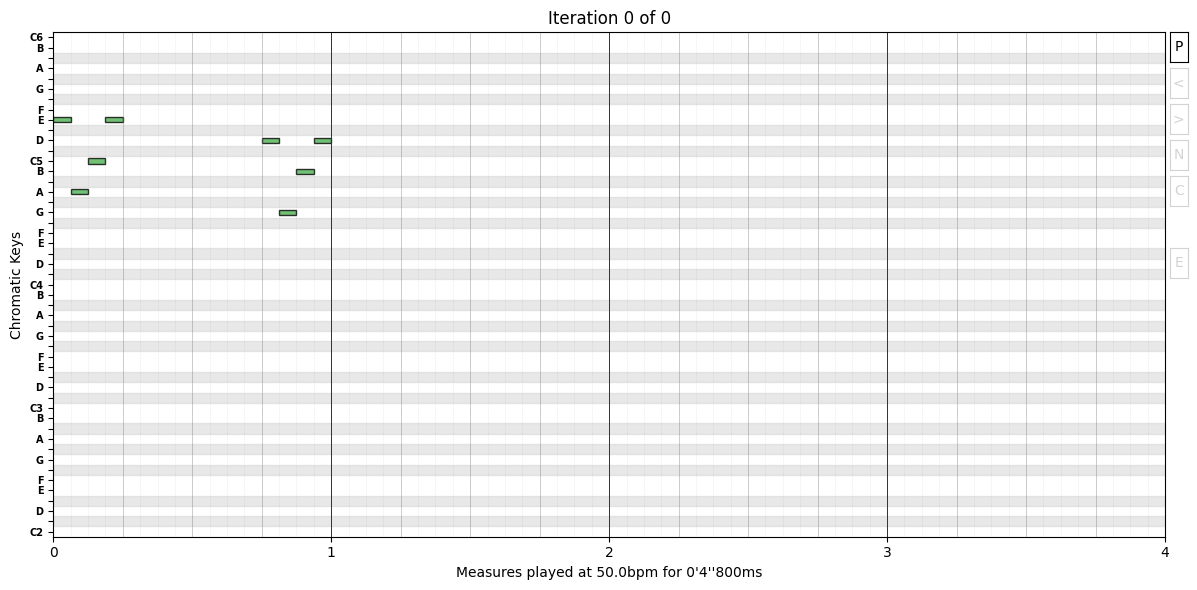

In [10]:
new_melody = treble_melody - treble_melody.mask(Or(Beat(1), Beat(2)))
new_melody << Velocity( treble_melody[Last()] ) >> Plot()

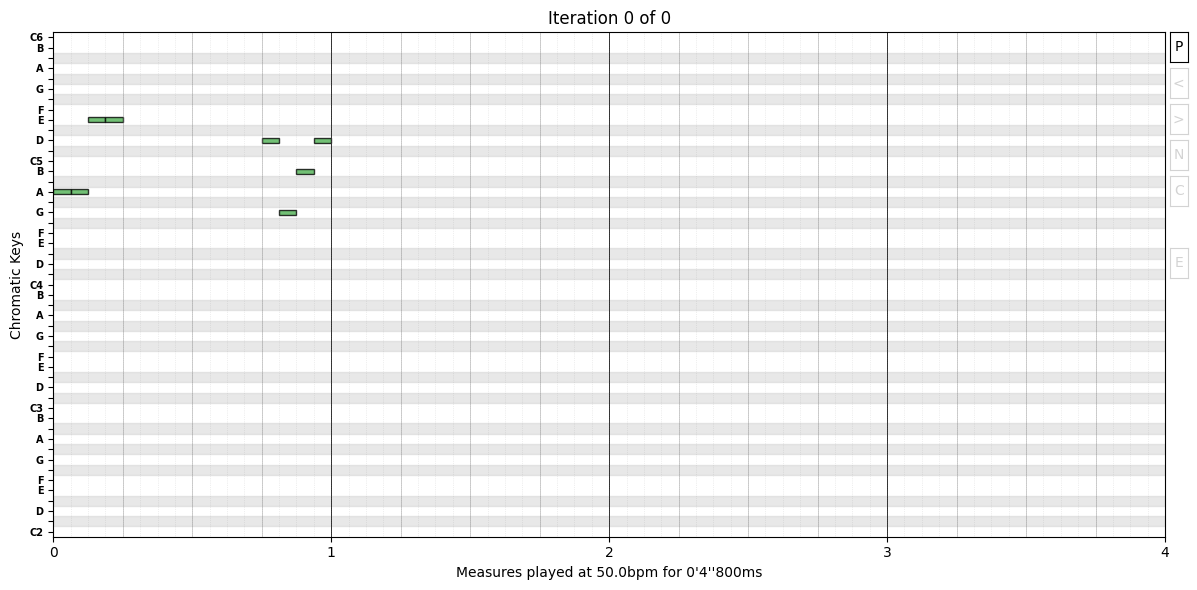

In [11]:
new_melody << Mux(2)**Cycle("A", "E")**RootKey() << Mux(2)**Cycle(4, 5)**Octave()
new_melody >> Plot()

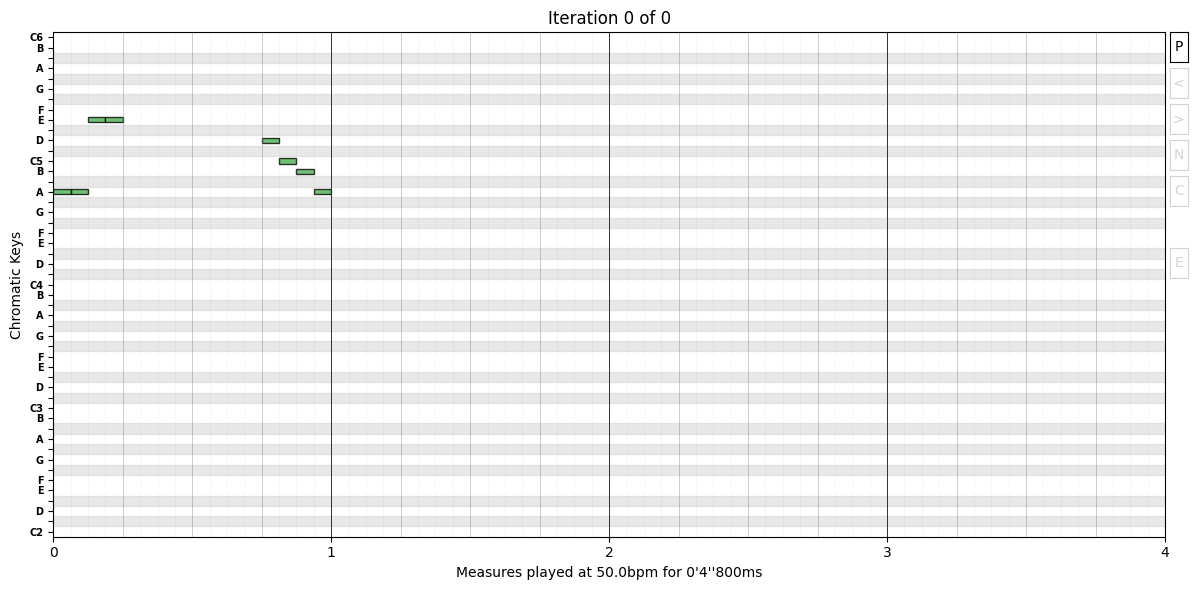

In [12]:
new_melody.mask(Beat(3)) << Previous()**Get(Pitch())**Subtract(1.0)
new_melody >> Plot()

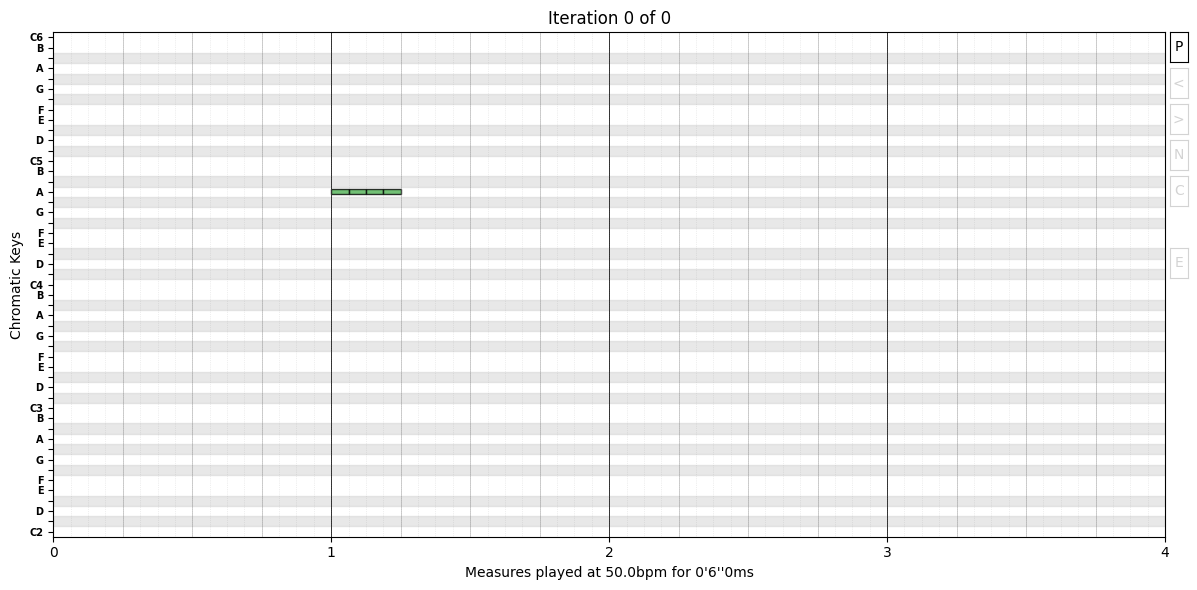

In [13]:
# This stack shall respect the Measure of the first `Element` (`Note`)
middle_notes = Note(Measure(1), 1/16) / 4
middle_notes >> Plot()

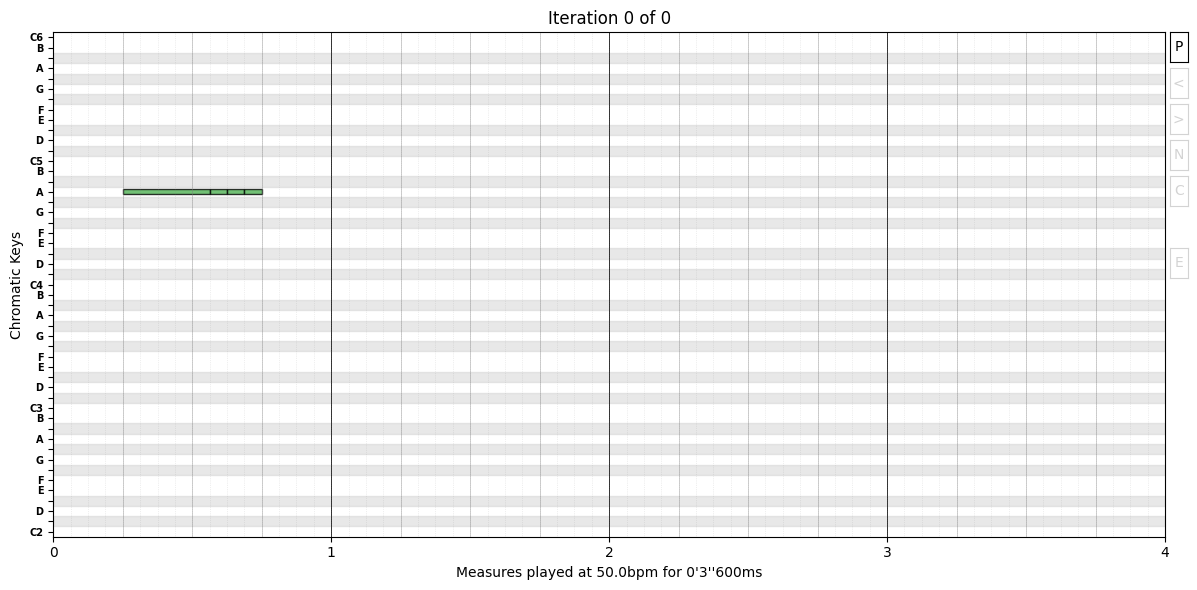

In [14]:
middle_notes << First()**(1/4 + 1/16) << Measure(0)
middle_notes >>= Stack()
middle_notes += Beat(1)
middle_notes >> Plot()

middle_notes 

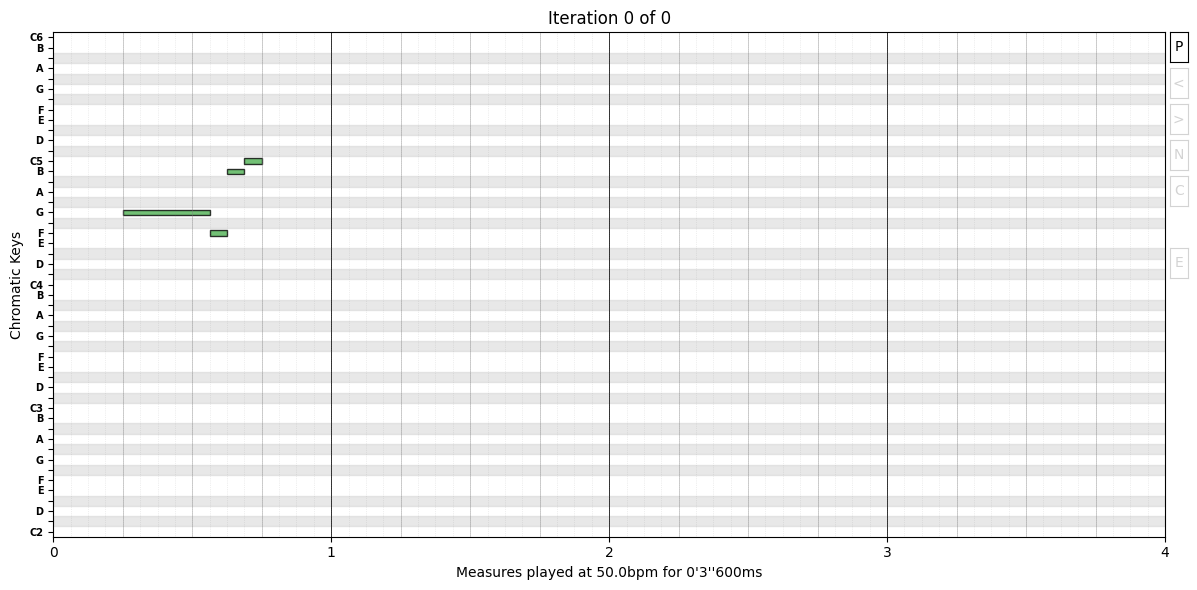

In [15]:
middle_notes += Foreach(-1, -2, +1, +2)**Degree()
middle_notes >> Plot()

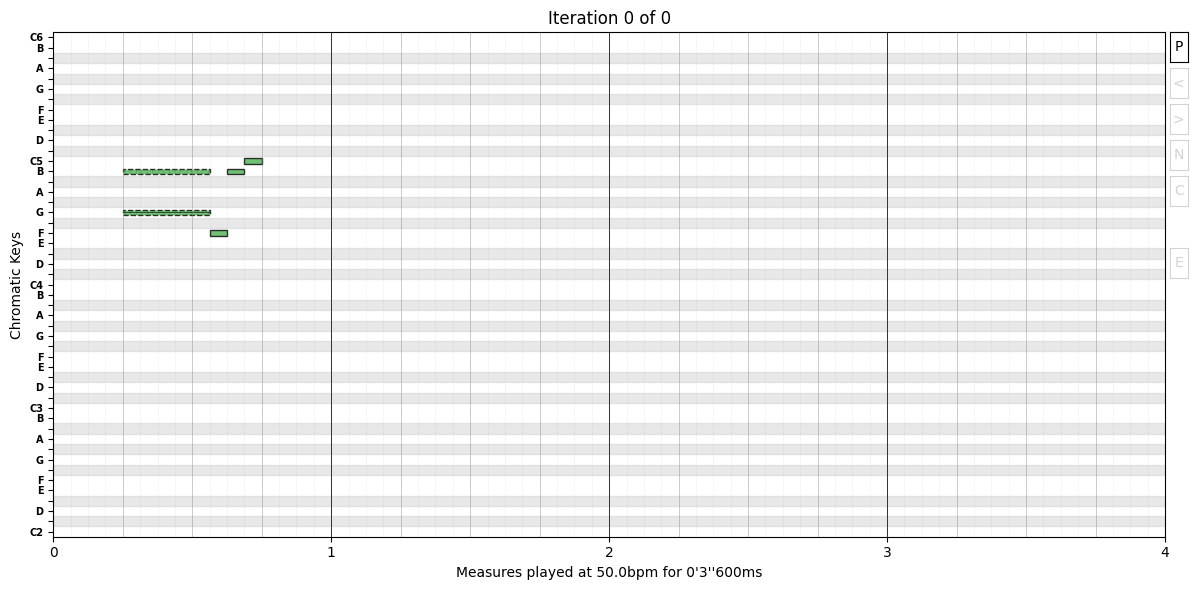

In [16]:
# This transforms single notes into Cluster notes, still a single element but with multiple pitches accordingly to the list given
middle_notes[First()] //= [0, 2.0]
middle_notes >> Plot()

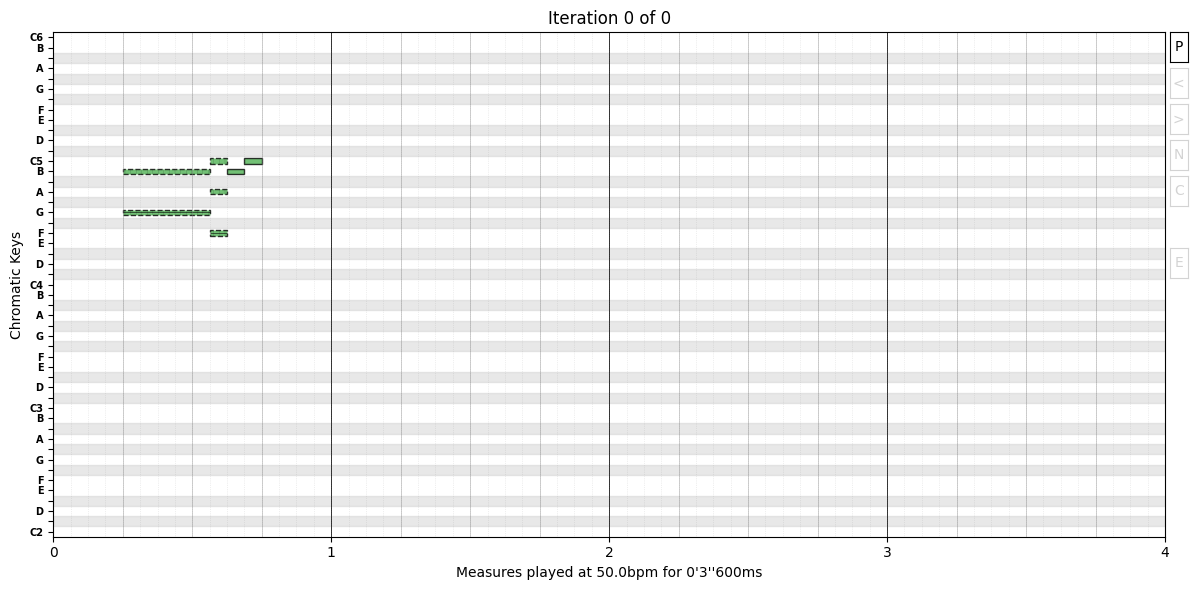

In [17]:
# Note that despite displayed as 3 Notes, in reality is just one single `Cluster` (Element) with three pitches !
middle_notes[Nth(2)] //= [0, 2.0, 4.0]
middle_notes >> Plot()

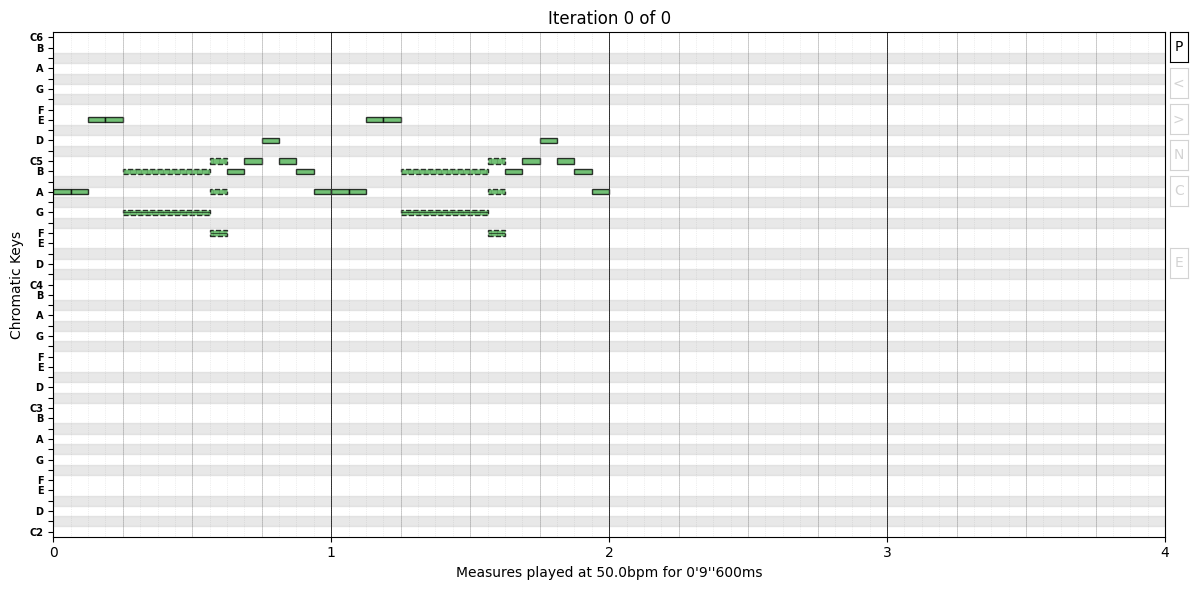

In [18]:
new_melody += middle_notes
new_melody *= 2
new_melody >> Plot()

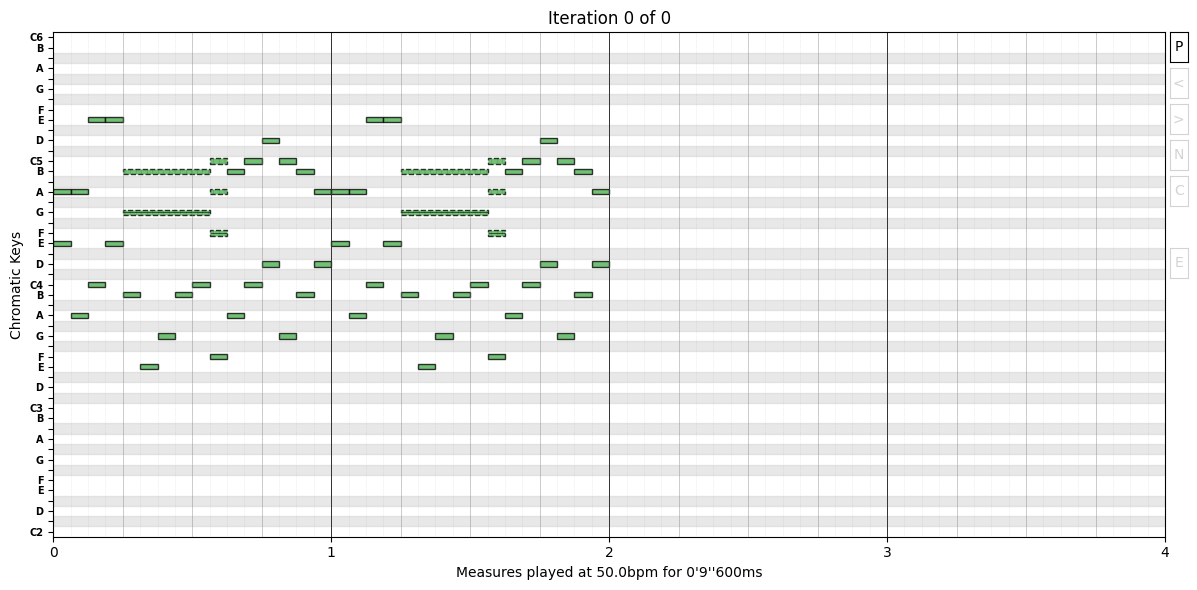

In [19]:
second_melody = new_melody + bass_melody * 2
second_melody << Velocity( bass_melody[Last()] ) >> Plot()

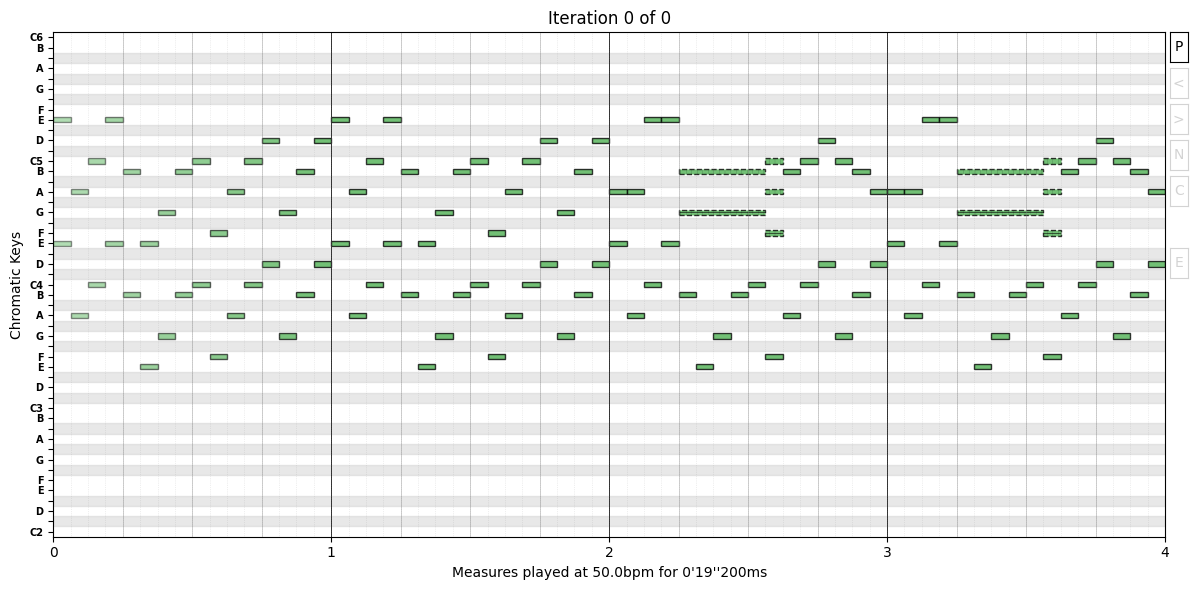

In [20]:
four_bars = first_melody * second_melody >> Plot()

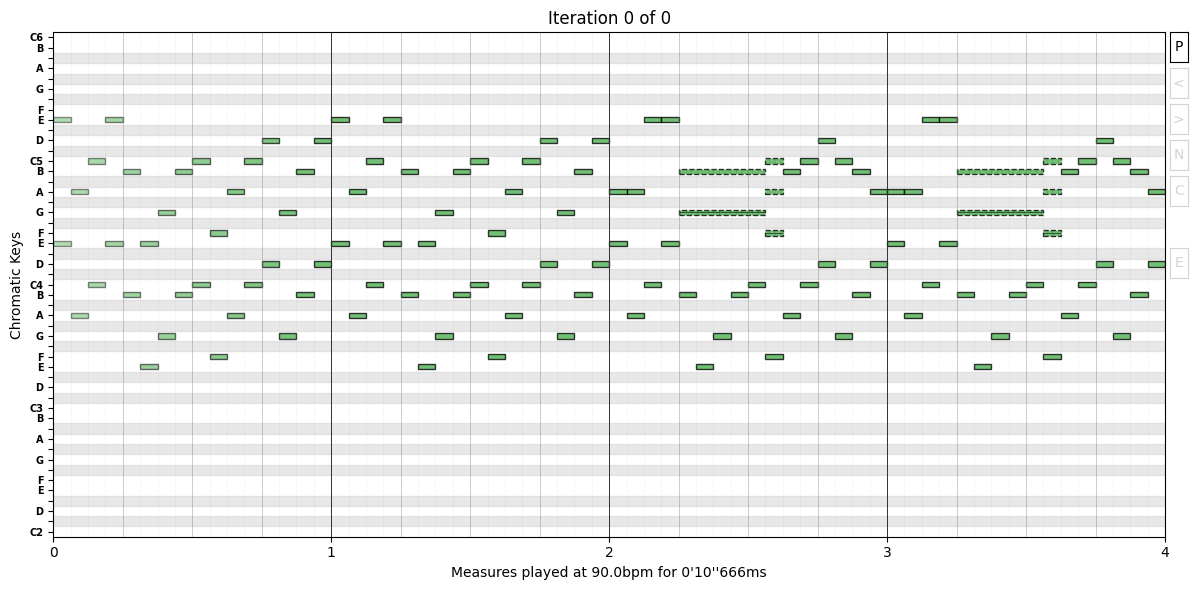

In [21]:
# Tempo is centralized in settings, so you can change the Tempo at any time like this
settings << Tempo(90)
four_bars >> Plot()

In [22]:
four_bars * 4 >> Play()